# **Logistic Regression, Naive Bayes Classification, SVM & KNN**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score)
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

**Load the Preprocessed Data**

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

train_df = pd.read_csv('../data/cleaned_train.csv')
test_df = pd.read_csv('../data/cleaned_test.csv')
print(f"Shape of training data: {train_df.shape}")
print(f"Number of features: {train_df.shape[1] - 2}")
print(f"Number of samples: {train_df.shape[0]}")

train_df.head()

Shape of training data: (7352, 563)
Number of features: 561
Number of samples: 7352


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


**Data Preparation**

In [3]:
X_train = train_df.drop(['subject','Activity'], axis=1)
y_train = train_df['Activity']

X_test = test_df.drop(['subject','Activity'], axis=1)
y_test = test_df['Activity']

print("Feature matrix shape:", X_train.shape)
print("Target vector shape:", y_train.shape)
print("\nTarget distribution:")
print(y_train.value_counts().sort_index())

n_classes = y_train.nunique()
print(f"\nNumber of activity classes: {n_classes}")

Feature matrix shape: (7352, 561)
Target vector shape: (7352,)

Target distribution:
Activity
0    1407
1    1286
2    1374
3    1226
4     986
5    1073
Name: count, dtype: int64

Number of activity classes: 6


**Feature Scaling For logistic regression**

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Training - Logistic Regression**

In [5]:
# Initialize Logistic Regression


lr_model = LogisticRegression(max_iter=1000,random_state=42,n_jobs=-1 )

# Train the model
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

**Evaluation of  Logistic Regression**

In [6]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")

Accuracy:  0.9549
Precision: 0.9566
Recall:    0.9549
F1-Score:  0.9548


**Model Training - Naive Bayes**

In [7]:
# Initialize Naive Bayes
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

**Evaluate Naive Bayes**

In [8]:
# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Accuracy:  {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall:    {nb_recall:.4f}")
print(f"F1-Score:  {nb_f1:.4f}")

Accuracy:  0.7703
Precision: 0.7947
Recall:    0.7703
F1-Score:  0.7688


**Model Training - SVM**

In [9]:
#Initialize the model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

**Evaluation of SVM**


In [10]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print("\n--- Support Vector Machine (SVM) Results ---")
print(f"Accuracy:  {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-Score:  {svm_f1:.4f}")




--- Support Vector Machine (SVM) Results ---
Accuracy:  0.9518
Precision: 0.9522
Recall:    0.9518
F1-Score:  0.9517


**Model Training - KNN**

In [11]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Train the model
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_jobs=-1)

**Evaluation of KNN**

In [12]:
# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("\n--- K-Nearest Neighbors (KNN) Results ---")
print(f"Accuracy:  {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall:    {knn_recall:.4f}")
print(f"F1-Score:  {knn_f1:.4f}")



--- K-Nearest Neighbors (KNN) Results ---
Accuracy:  0.8836
Precision: 0.8906
Recall:    0.8836
F1-Score:  0.8827


Running 5-Fold Cross-Validation...
Logistic Regression: Average Accuracy = 0.9350 (Std Dev: 0.0245)
Gaussian Naive Bayes: Average Accuracy = 0.6861 (Std Dev: 0.0721)
Kernel SVM: Average Accuracy = 0.9272 (Std Dev: 0.0183)
K-Nearest Neighbors: Average Accuracy = 0.8708 (Std Dev: 0.0116)


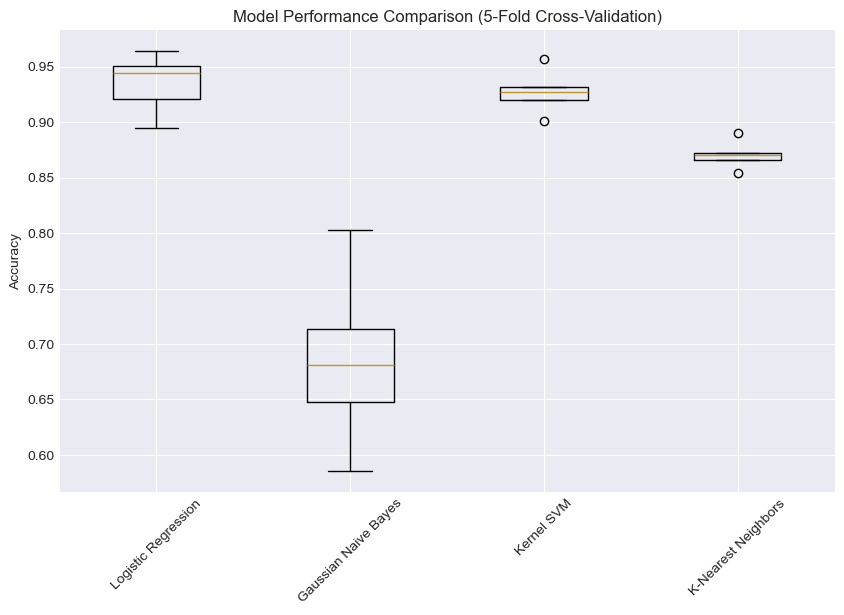

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np

# --- Re-define Models for Cross-Validation ---
# It's good practice to re-initialize the models here
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42,n_jobs=-1 ),
    'Gaussian Naive Bayes': GaussianNB(),
    'Kernel SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

# --- Perform 5-Fold Cross-Validation for Each Model ---
print("Running 5-Fold Cross-Validation...")
results = {}
for name, model in models.items():
    # Note: We use the full X_train and y_train here, as cross_val_score handles the splitting.
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Average Accuracy = {np.mean(cv_scores):.4f} (Std Dev: {np.std(cv_scores):.4f})")

# --- Visualize the Cross-Validation Results ---
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Model Performance Comparison (5-Fold Cross-Validation)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

**Cross-Validation for Logistic Regression**


--- Analyzing the Best Model: Logistic Regression ---


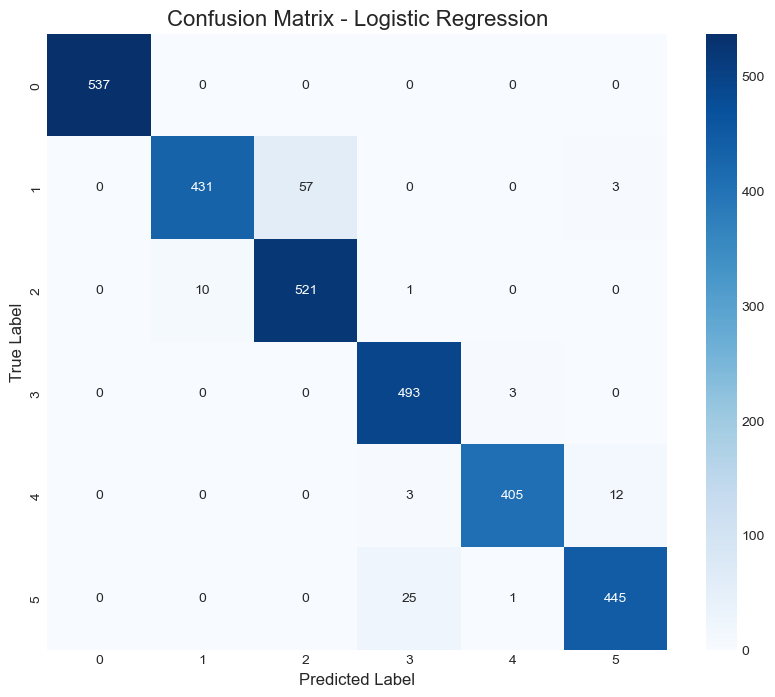

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Generate and Plot the Confusion Matrix for the Best Model ---
# Logistic Regression was the best performer. We'll train it on the full training set
# and evaluate on the test set to see its final performance breakdown.

print("\n--- Analyzing the Best Model: Logistic Regression ---")
best_model = LogisticRegression(max_iter=1000,random_state=42,n_jobs=-1 )
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best, labels=best_model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()


--- Generating Multi-Class ROC Curves for Logistic Regression (Corrected) ---

AUC Scores by Activity (Full Precision):
  0                   : 0.999985
  1                   : 0.992571
  2                   : 0.995216
  3                   : 0.999567
  4                   : 0.999366
  5                   : 0.998529


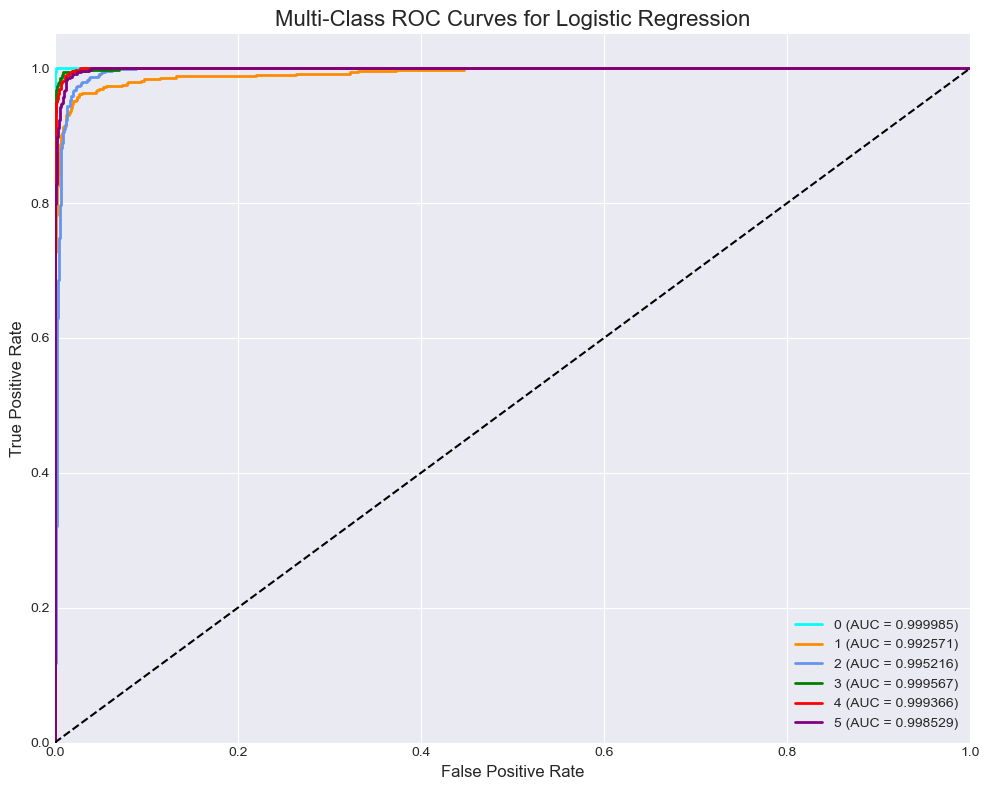

In [15]:
from sklearn.preprocessing import label_binarize, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# --- ROC Curve Analysis for Logistic Regression ---
print("\n--- Generating Multi-Class ROC Curves for Logistic Regression (Corrected) ---")

# Encode labels (ensures proper numeric mapping)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Binarize the labels for the One-vs-Rest approach
classes = np.unique(y_train_enc)
y_train_bin = label_binarize(y_train_enc, classes=classes)
y_test_bin = label_binarize(y_test_enc, classes=classes)
n_classes = y_train_bin.shape[1]

# Train the Logistic Regression model
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_scaled, y_train_enc)

# Get the probability scores for each class (on test data)
y_score = classifier.predict_proba(X_test_scaled)

# --- Compute ROC Curve and AUC for each class ---
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print exact AUC values (no rounding)
print("\nAUC Scores by Activity (Full Precision):")
for i, activity in enumerate(le.classes_):
    print(f"  {str(activity):20s}: {roc_auc[i]:.6f}")

# --- Plot all ROC curves (light style) ---
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f"{le.classes_[i]} (AUC = {roc_auc[i]:0.6f})"
    )

# Add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curves for Logistic Regression', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()


AdaBoost(Decision Tree base)

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    random_state=42
)

ada_param_grid = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2]
}

ada_grid = GridSearchCV(
    estimator=ada,
    param_grid=ada_param_grid,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=0
)

ada_grid.fit(X_train_scaled, y_train)
ada_best = ada_grid.best_estimator_

Evaluation 

In [26]:
y_pred_ada = ada_best.predict(X_test_scaled)

ada_accuracy  = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)
ada_recall    = recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)
ada_f1        = f1_score(y_test, y_pred_ada, average='weighted', zero_division=0)

print(f"Accuracy:  {ada_accuracy:.4f}")
print(f"Precision: {ada_precision:.4f}")
print(f"Recall:    {ada_recall:.4f}")
print(f"F1-Score:  {ada_f1:.4f}")

Accuracy:  0.9491
Precision: 0.9503
Recall:    0.9491
F1-Score:  0.9490


Model Training - Random Forest 

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=0
)

rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_


Evaluation of Random Forest

In [18]:
#Make predicions
y_pred_rf = rf_best.predict(X_test_scaled)

#calculates metrics
rf_accuracy  = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_recall    = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_f1        = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")

Accuracy:  0.9274
Precision: 0.9283
Recall:    0.9274
F1-Score:  0.9271
